In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'credit-card-customer-churn-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F869651%2F1481789%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240708%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240708T074839Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D155d8490be017e10a09ae8d39a6282115ddff42ce728629f8f26225fedc33fb152331f220bebe14336ad39b88e108867224c0e7ad4f8291b5023a15a7ad2ac76d419a58bed56da228ffdc7c5683634b84498519e22b89815a243c51638b5a85f131bf14af8496a6e54ceace9168f1ef7e0400e9bfee0fd9cc4d381fda529440c31470689a1c07b252c8d139adac33f8860f50c0d016705c48044c3758842da90112b63f10f580ffc2d3f6ef22ab9ddeaa65d0c93a2b9e9dd1ba961360dd950f4aac6f3894b78272866575d6df2b05a5ddcf24ee6efedfa9ae503b580fd2ff7ea76952194ecf6ec635ee77013dc34ea73c955e9ddf7a8e81731c1f96eccaf6b3c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 267794 bytes downloaded
Downloaded and uncompressed: credit-card-customer-churn-prediction
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()


Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True, dtype='int')

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
x=df.drop(columns=['Exited'])
y=df['Exited'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [ ]:
x_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test_scaled

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,epochs=100, validation_split=0.1)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7946 - loss: 0.5056 - val_accuracy: 0.7950 - val_loss: 0.4877
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4867 - val_accuracy: 0.7950 - val_loss: 0.4616
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.4634 - val_accuracy: 0.7950 - val_loss: 0.4381
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4327 - val_accuracy: 0.7937 - val_loss: 0.4252
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4443 - val_accuracy: 0.8087 - val_loss: 0.4184
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8027 - loss: 0.4309 - val_accuracy: 0.8188 - val_loss: 0.4154
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.4183 - val_accuracy: 0.8200 - val_loss: 0.4133
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.4322 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[ 0.20239608, -0.0566964 , -0.1569769 ,  0.25576833,  0.11132639,
          0.05357913, -0.00381918, -0.02075573,  0.0604424 ,  0.43125853,
          0.28098798],
        [-0.5965441 ,  1.7783872 , -0.7198236 , -1.8577604 , -0.48030668,
         -0.38364044, -0.04314894,  0.5887616 ,  2.4018793 , -0.03430502,
          2.2865577 ],
        [-0.01381313, -0.1724478 , -0.70804286, -0.08993188, -0.0505961 ,
          0.17415702, -0.22886376, -0.12947473, -0.58958954,  0.07846593,
          0.23892121],
        [ 0.5592067 , -0.41954672, -0.12257051,  0.47715425, -0.49060306,
          0.56488335,  0.20252943,  0.3448279 , -0.6293728 , -1.6793338 ,
          0.895173  ],
        [ 1.5641032 ,  0.57879746, -0.03139334,  0.02853488, -3.2810016 ,
          0.38923985, -0.762465  , -0.20868097,  0.17263983, -0.99228835,
          0.40919235],
        [ 0.06188841,  0.2542865 ,  0.514169  , -0.11019932,  0.12898585,
         -0.11783856, -0.04745423,  0.56301004, -0.27698132,  0.1957882

In [ ]:
model.layers[1].get_weights()

[array([[ 2.1491723 , -1.3622577 , -1.6227719 ,  1.7544564 , -1.507678  ,
          0.8547524 , -1.166591  , -1.1125283 , -1.7849225 , -1.5868205 ,
         -1.445569  ],
        [ 0.03514076, -0.70250976, -0.79931825,  0.42912892, -0.09538231,
          0.46509233, -0.01493627,  0.1960243 , -0.5928297 , -0.1680338 ,
         -0.31578395],
        [-0.14771067, -0.28453457, -0.33352026, -0.50040555, -0.55826855,
          1.1011474 , -0.6668477 , -1.329218  , -0.22168769, -0.55635375,
         -0.21416521],
        [-1.0963337 ,  0.83642834,  0.7650915 , -1.4812496 ,  1.4960635 ,
         -0.35969335,  1.0469038 , -0.08639366,  1.0051193 ,  0.83229053,
          1.3983322 ],
        [ 2.1100338 , -1.671798  , -1.5671345 ,  2.2464063 , -1.328996  ,
          1.3213367 , -1.701098  , -1.7179295 , -1.6698284 , -1.6948725 ,
         -1.3706876 ],
        [ 0.17066796, -0.05598763,  0.24386373, -0.03648089, -0.6835997 ,
          1.0364486 , -0.79529846, -1.3505857 ,  0.15440841, -0.4096255

In [ ]:
model.layers[2].get_weights()

[array([[ 1.7919389],
        [-1.1225394],
        [-1.1037306],
        [ 1.6209816],
        [-1.1833409],
        [ 1.3253824],
        [-1.052907 ],
        [-1.4118046],
        [-1.1241956],
        [-1.6694316],
        [-1.3982087]], dtype=float32),
 array([0.47954756], dtype=float32)]

In [ ]:
model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.30005732],
       [0.2518482 ],
       [0.1418537 ],
       ...,
       [0.14042687],
       [0.10984987],
       [0.26124847]], dtype=float32)

In [ ]:
threshold=model.predict(x_test_scaled)
y_pred=np.where(threshold>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [ ]:
history.history

{'accuracy': [0.7961111068725586,
  0.7961111068725586,
  0.7961111068725586,
  0.79666668176651,
  0.8026388883590698,
  0.8069444298744202,
  0.8127777576446533,
  0.8140277862548828,
  0.8163889050483704,
  0.8181944489479065,
  0.8193055391311646,
  0.8206944465637207,
  0.8219444155693054,
  0.8222222328186035,
  0.8223611116409302,
  0.8248611092567444,
  0.824999988079071,
  0.8262500166893005,
  0.8256944417953491,
  0.8268055319786072,
  0.8266666531562805,
  0.8295833468437195,
  0.8302778005599976,
  0.8291666507720947,
  0.8302778005599976,
  0.8302778005599976,
  0.8299999833106995,
  0.8320833444595337,
  0.8322222232818604,
  0.8324999809265137,
  0.8337500095367432,
  0.8348610997200012,
  0.835694432258606,
  0.8379166722297668,
  0.8383333086967468,
  0.8388888835906982,
  0.8405555486679077,
  0.8415277600288391,
  0.8430555462837219,
  0.8454166650772095,
  0.8443055748939514,
  0.8463888764381409,
  0.8468055725097656,
  0.8480555415153503,
  0.847777783870697,
  0

In [ ]:
import matplotlib.pyplot as plt

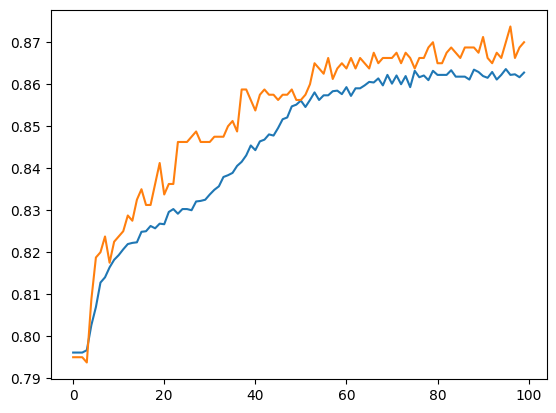

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

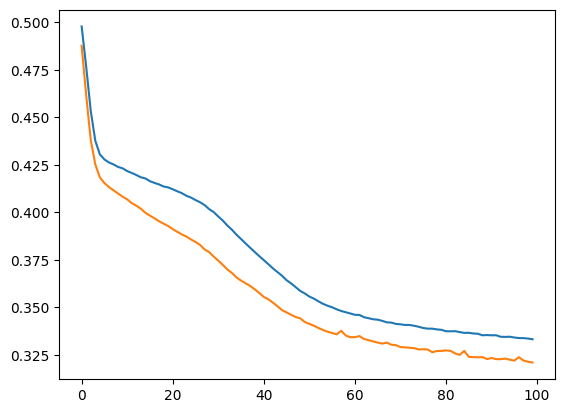

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])